# 第一课 猫狗识别

## windows 10下的运行环境配置

1. 安装anaconda 5.2版本并进行更新
```bash
conda update --all
```

2. 安装pythorch 0.4版本, 需搭配CUDA 9.0版本

   ```bash
   conda install pytorch -c pytorch
   pip3 install torchvision
   ```

3. 在运行过程中可能会出现 `import PIL.Image` 的错误, 这里需要

   ```bash
   conda uninstall pillow
   pip intall pillow
   ```

   如果`pip`安装不了, 就去[这里](https://www.lfd.uci.edu/~gohlke/pythonlibs/)下载, 然后本地安装.

4. 在本地下载fastai

   ```bash
   git pull https://github.com/fastai/fastai.git
   ```

## 第一个示例

1. 为了在notebook中能导入本地的fastai, 要加入路径

In [1]:
import sys
sys.path.append("E:\\MyProject\\Book\\fastai\\old")
print(sys.path)

['', 'C:\\Anaconda3\\python36.zip', 'C:\\Anaconda3\\DLLs', 'C:\\Anaconda3\\lib', 'C:\\Anaconda3', 'C:\\Users\\cuif1\\AppData\\Roaming\\Python\\Python36\\site-packages', 'c:\\Users\\cuif1\\.vscode\\extensions\\almenon.arepl-1.0.3\\node_modules\\arepl-backend\\python', 'C:\\Anaconda3\\lib\\site-packages', 'C:\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\cuif1\\.ipython', 'E:\\MyProject\\Book\\fastai\\old']


2. 在`notebook`中加入必备的库:

In [2]:
# to get automatic reloading
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import fastai
# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

3. 设定数据目录, `sz`是图片重置后的尺寸, 以确保运算速度(具体看以后的课程解释)

In [3]:
PATH = "E:/MyProject/Book/fastai/data/dogscats/" # 根据个人情况调整
sz = 224

4. 确认`CUDA`和`CuDNN`是否启用:

In [5]:
torch.cuda.is_available()

True

In [6]:
torch.backends.cudnn.enabled

True

5. 获取[数据](http://files.fast.ai/data/dogscats.zip), 将其解压至前面指定的目录`PATH`中
   - 解压后, 可以尝试去显示其中的图片

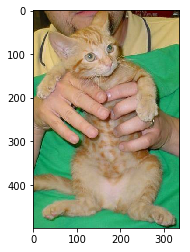

In [7]:
files = os.listdir(f'{PATH}valid/cats')[:5]
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img)

- 其中的数据为三维形式, 可通过命令查看:

In [8]:
img[:4, :4]

array([[[60, 57, 12],
        [60, 57, 14],
        [63, 55, 18],
        [63, 54, 21]],

       [[56, 53,  8],
        [56, 53, 10],
        [59, 51, 14],
        [60, 51, 18]],

       [[52, 49,  4],
        [52, 49,  6],
        [55, 47, 11],
        [56, 47, 16]],

       [[50, 47,  2],
        [50, 47,  4],
        [53, 45,  9],
        [53, 44, 13]]], dtype=uint8)

6. 训练数据, 进行拟合:

In [9]:
arch = resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.04764    0.030804   0.988     
    1      0.043333   0.030177   0.9905                                                                             



[0.030177337527275087, 0.9905]

这里采用的是`resnet34`模型, 具体可参见[这里](https://github.com/KaimingHe/deep-residual-networks).
   - 在上述的`data`中包含了一些有用的属性, 比如

In [10]:
# 返回数据的标签
data.val_y

array([0, 0, 0, ..., 1, 1, 1])

In [11]:
# 返回类别
data.classes

['cats', 'dogs']